## Direct imaging for all-sky arrays


In [1]:
from astropy.coordinates import SkyCoord, Angle
from astropy.time import Time
import numpy as np
import pylab as plt
import ephem
import healpy as hp

### Using `RadioArray`

/Users/dancpr/Data/eda_post_x/postx/ant_array.py:261: RuntimeWarning: divide by zero encountered in log
  data = np.log(np.abs(self.data)) if log else np.abs(self.data)


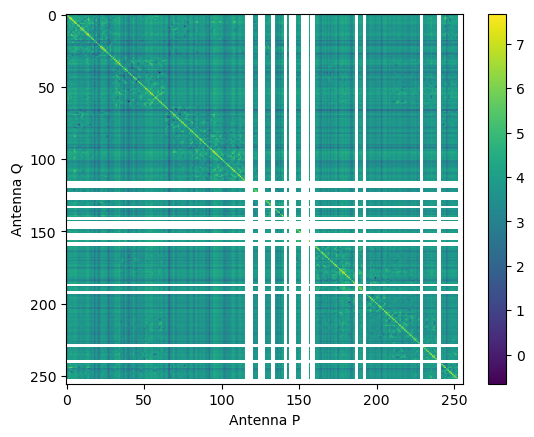

In [2]:
from postx.ant_array import RadioArray

filename_data = 'test_data/eda_vis_real.fits'
filename_ant  = 'test_data/eda_antenna_locations.h5'
# Setup array
f_mhz = np.array([159.3750])
lat = '-26:42:11:95'
lon = '116:40:14.93'
elev = 500
t = Time('2020-02-09T03:46:46.0', format='isot')
sun = ephem.Sun()

# Initialize EDA array
eda = RadioArray(lat, lon, elev, f_mhz, filename_ant, t0=t.datetime, verbose=True, phase_center=sun)
eda.load_fits_data(filename_data)

eda.plot_corr_matrix()

### Making and viewing all-sky images

/Users/dancpr/Data/eda_post_x/postx/ant_array.py:241: RuntimeWarning: invalid value encountered in sqrt
  ng     = np.sqrt(1 - lg**2 - mg**2)
/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_49285/810535071.py:16: RuntimeWarning: invalid value encountered in log
  asv.plot(np.log(gsm[::-1]), subplot_id=(1,2,2), overlay_srcs=True, title='Global Sky Model')


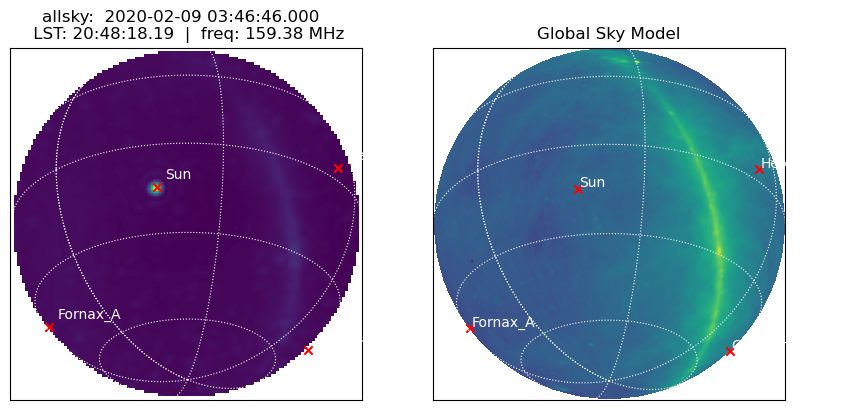

In [3]:
from postx.allsky_viewer import AllSkyViewer, generate_skycat

img = eda.make_image()
gsm = eda.generate_gsm()

asv = AllSkyViewer(observer=eda, ts=t, f_mhz=f_mhz[0], n_pix=128)
skycat = generate_skycat(asv.observer)
asv.load_skycat(skycat)

plt.figure(figsize=(10, 5))
asv.plot(img, subplot_id=(1,2,1), overlay_srcs=True)


asv = AllSkyViewer(observer=eda, ts=t, f_mhz=f_mhz[0], n_pix=800)
asv.load_skycat(skycat)
asv.plot(np.log(gsm[::-1]), subplot_id=(1,2,2), overlay_srcs=True, title='Global Sky Model')

### Direct to healpix imaging

/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_49285/829450563.py:4: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(hmap), coord='G')


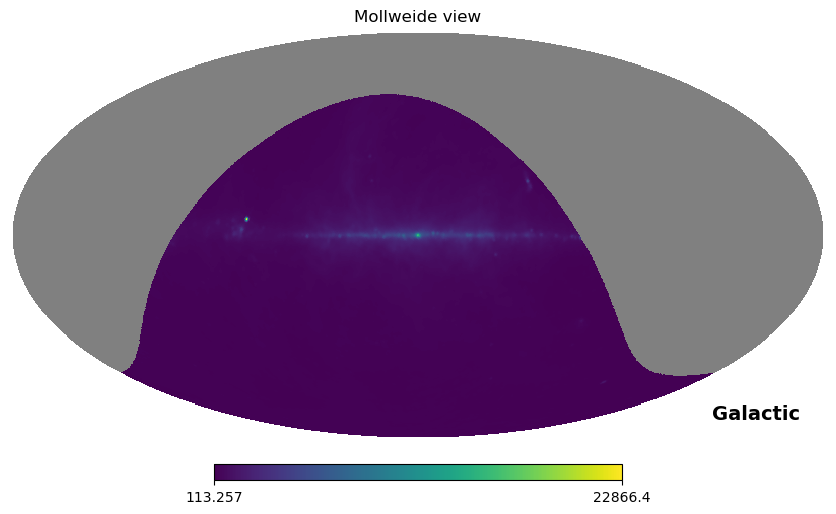

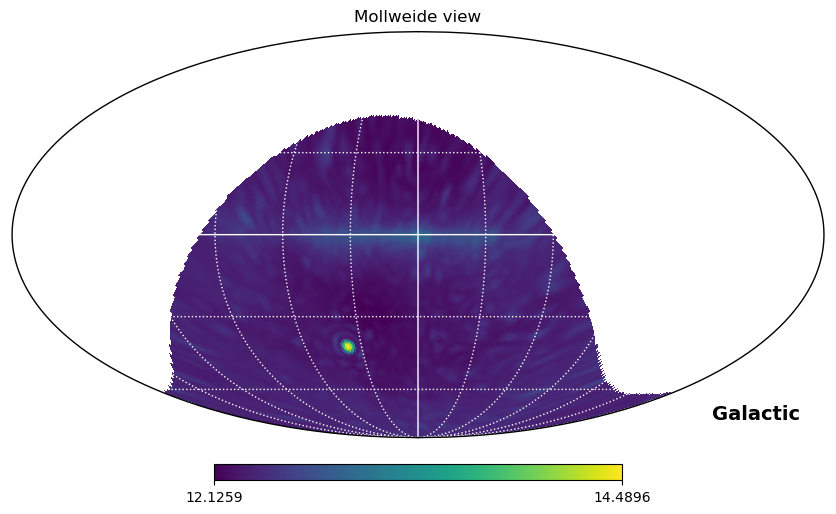

In [4]:
eda.gsm.view_observed_gsm()

hmap = eda.make_healpix(n_side=64, fov=np.pi/2*0.9, apply_mask=True)
hp.mollview(np.log(hmap), coord='G')
hp.graticule(color='white')

### AAVS example

Updating datetime
Updating freq idx
Updating phase vector


/Users/dancpr/Data/eda_post_x/postx/ant_array.py:261: RuntimeWarning: divide by zero encountered in log
  data = np.log(np.abs(self.data)) if log else np.abs(self.data)


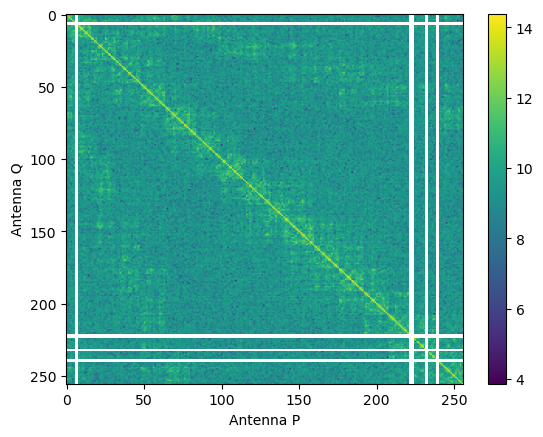

In [5]:
# antenna positions are stored in aavs dataset
filename_aavs = 'test_data/aavs_data.h5'

# Setup array
f_mhz = np.array([158912036.96/1e6])
lat = '-26:42:11:95'
lon = '116:40:14.93'
elev = 500

# Initialize EDA array
aavs = RadioArray(lat, lon, elev, f_mhz, filename_aavs, verbose=True)
aavs.load_h5_data(filename_aavs)

# Workaround: Jishnu's data doesn't need phase correction
c0 = np.copy(aavs.workspace['c0'])
aavs.workspace['c0'] = np.ones_like(aavs.workspace['c0'])

t = Time(aavs.date.datetime())
aavs.plot_corr_matrix()

### Make an image

/Users/dancpr/Data/eda_post_x/postx/ant_array.py:241: RuntimeWarning: invalid value encountered in sqrt
  ng     = np.sqrt(1 - lg**2 - mg**2)
/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_49285/1967736225.py:14: RuntimeWarning: invalid value encountered in log
  asv.plot(np.log(gsm[::-1]), subplot_id=(1,2,2), overlay_srcs=True)


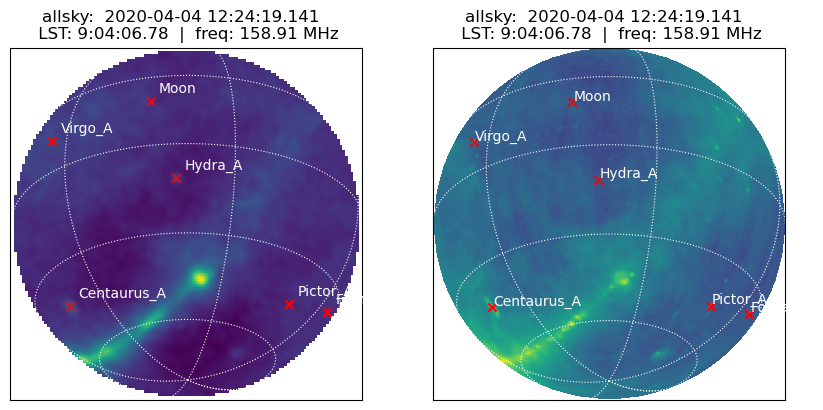

In [6]:
img = aavs.make_image()
gsm = aavs.generate_gsm()

asv = AllSkyViewer(observer=aavs, ts=t, f_mhz=f_mhz[0], n_pix=128)
skycat = generate_skycat(asv.observer)
asv.load_skycat(skycat)


plt.figure(figsize=(10, 5))
asv.plot(img, subplot_id=(1,2,1), overlay_srcs=True)

asv = AllSkyViewer(observer=aavs, ts=t, f_mhz=f_mhz[0], n_pix=800)
asv.load_skycat(skycat)
asv.plot(np.log(gsm[::-1]), subplot_id=(1,2,2), overlay_srcs=True)

### Make healpix map

/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_49285/1514702317.py:4: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(hmap), coord='G')


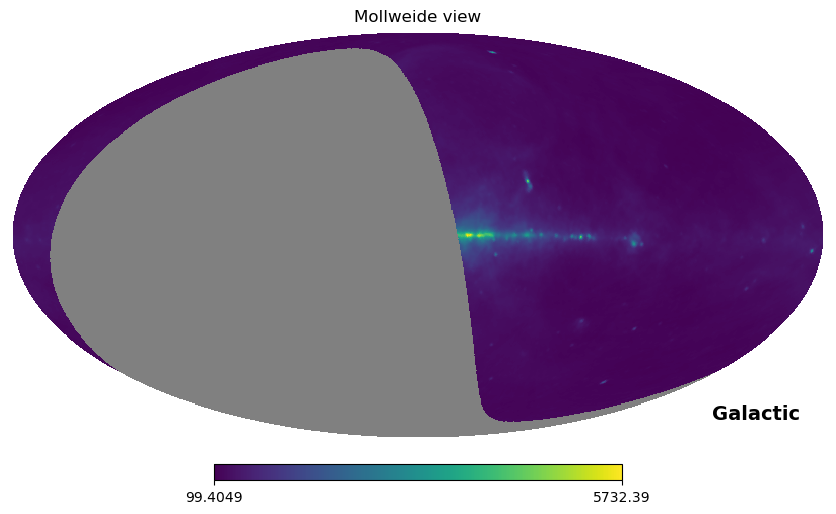

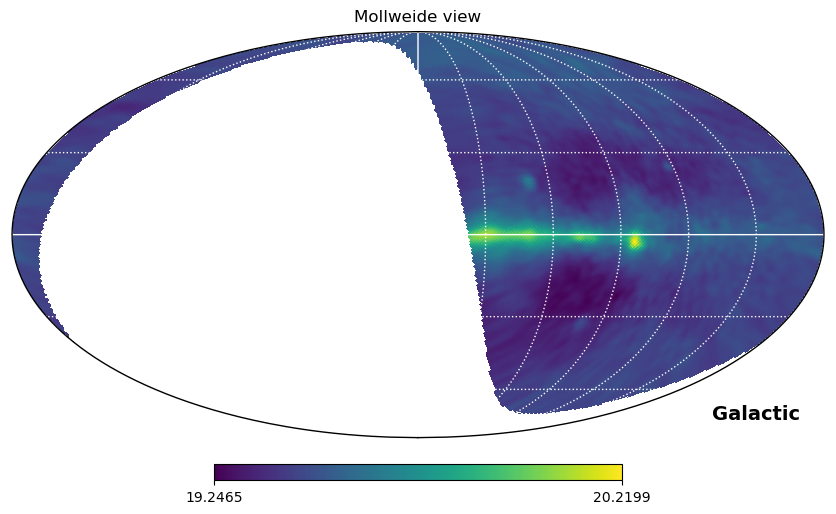

In [7]:
aavs.gsm.view_observed_gsm()

hmap = aavs.make_healpix(n_side=64, fov=np.pi/2*0.95, apply_mask=True)
hp.mollview(np.log(hmap), coord='G')
hp.graticule(color='white')

### Speed comparisons

In [8]:
%timeit  aavs.make_healpix(n_side=64, fov=np.pi/2*0.9, apply_mask=True)

279 ms ± 5.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit  aavs.make_healpix(n_side=64, fov=np.pi/2*0.9, apply_mask=True, update=False)

148 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%timeit aavs.make_image(128, update=True)

/Users/dancpr/Data/eda_post_x/postx/ant_array.py:241: RuntimeWarning: invalid value encountered in sqrt
  ng     = np.sqrt(1 - lg**2 - mg**2)


200 ms ± 6.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit aavs.make_image(128, update=False)

118 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
